In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import urllib.request
import json
import sys
import re
sys.path.append('./helpers/')
sys.path.append('./feature_engineering/')
import names
import helpers

reload(helpers)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lucastrg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lucastrg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<module 'helpers' from '/home/lucastrg/FLEP/MA1/ADA/ada-2021-project-adada-sur-mon-bidet/./helpers/helpers.py'>

In [2]:
df = helpers.get_samples(num_samples=10000, random=True)

In [3]:
df=df[df["speaker"]!="None"]

In [4]:
df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
7,2020-01-17-000357,[ The delay ] will have an impact [ on Slough ...,Dexter Smith,[Q5268447],2020-01-17 13:03:00,1,"[[Dexter Smith, 0.924], [None, 0.076]]",[http://www.sloughexpress.co.uk/gallery/slough...,E
19,2020-02-21-000455,2019 was a landmark year for Fiverr as we comp...,Micha Kaufman,[Q26923564],2020-02-21 13:00:00,1,"[[Micha Kaufman, 0.9409], [None, 0.0591]]",[https://www.fool.com/investing/2020/02/21/why...,E
28,2020-03-18-000741,A face-to-face duty lawyer service provided by...,Mike Dwyer,[Q6379626],2020-03-18 07:47:15,12,"[[Mike Dwyer, 0.6042], [None, 0.3958]]",[http://www.balonnebeacon.com.au/news/tourism-...,E
29,2020-01-26-000499,a few of the candidates who will do better in ...,Dave Loebsack,[Q771586],2020-01-26 13:21:36,11,"[[Dave Loebsack, 0.9011], [None, 0.0949], [Joe...",[http://rss.cnn.com/~r/rss/cnn_allpolitics/~3/...,E
30,2020-02-05-001246,A full restoration can run from about 120 all ...,Bill Kilpatrick,[Q4909730],2020-02-05 00:00:00,1,"[[Bill Kilpatrick, 0.8531], [None, 0.1469]]",[http://whec.com/news/small-business-spotlight...,E


In [5]:
df[df["speaker"]=="Donald Trump"]

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase


In [6]:
qids=list(set(df["qids"].to_numpy().sum()))
speakers=list(set(df["speaker"]))

In [7]:
len(qids)
len(speakers)

4928

In [8]:
speakers

['David Engel',
 'Stuart Croft',
 'Eliud Kipchoge',
 'Claudia Jordan',
 'Laura Wells',
 'Sam Groth',
 'theater director',
 'Shamil Tarpishchev',
 'Pep Hamilton',
 'Ryan Day',
 'Gary Vaynerchuk',
 'Tucker West',
 'Jim Risch',
 'Ben Wilson',
 'Tiki Ghosn',
 'Jeff Smith',
 'Sandy Middleton',
 'Chamique Holdsclaw',
 'Danny Brom',
 'Christine Watson',
 'Joshua Kimmich',
 'Feras Fayyad',
 'Javier Salazar',
 'Chris Harrison',
 'Joanne Martin',
 'Sam Ricketts',
 'Reynato Puno',
 'Justin Brownlee',
 'Michael Fisher',
 'Matt Windschitl',
 'Oisin Murphy',
 'John Waters',
 'Jack Clark',
 'Elvire Fabry',
 'Brendan Rodgers',
 'Clarence Jones',
 'Graham Jennings',
 'Matt Walsh',
 'Sir Patrick Stewart',
 'Borys Gudziak',
 'Dan Williams',
 'Rebekah Brooks',
 'Jake Kelly',
 'Eric Musselman',
 'Rosemary Roberts',
 'Wu Di',
 'Scott Drew',
 'Josep Borrell',
 'Jack Dorsey',
 'Nate Silver',
 'David Prutton',
 'Mark Warner',
 'Lon Kruger',
 'Catherine Bell',
 'Deborah Solomon',
 'chloe hosking',
 'Kieran McKe

Yes

In [9]:
request_template= "https://www.wikidata.org/wiki/Special:EntityData/{}.json"
request_template2="https://en.wikipedia.org/w/api.php?action=query&format=json&prop=revisions&titles={}&formatversion=2&rvprop=content&rvslots=*"
request_template3="https://en.wikipedia.org/w/api.php?action=query&format=json&prop=revisions&pageids={}&formatversion=2&rvprop=content&rvslots=*"


In [10]:
invalid_qids=[]
for qid in qids[:10]:
   try :
      with urllib.request.urlopen(request_template.format(qid)) as response:
         raw_data = response
         data = json.load(raw_data)
         data.keys()
   except urllib.request.HTTPError :
      invalid_qids.append(qid)


      #print(json.dumps(data, indent=2, sort_keys=True))
      

In [11]:
qid_to_rid

{'Q311007': 1519827423,
 'Q18630838': 1485425120,
 'Q30071045': 1428160024,
 'Q6768848': 1430523223,
 'Q59545990': 1397281690,
 'Q6256508': 1316242758,
 'Q16114482': 1484832171,
 'Q716765': 1519831414,
 'Q943061': 1491194045,
 'Q7329260': 1426072190}

Doesn't work atm, not really useful so might drop

In [12]:
invalid_qids=[]
for qid in qids[:10]:
   try :
      with urllib.request.urlopen(request_template3.format(qid_to_rid[qid])) as response:
         raw_data = response
         data = json.load(raw_data)
         data.keys()
   except urllib.request.HTTPError :
      invalid_qids.append(qid)


      #print(json.dumps(data, indent=2, sort_keys=True))
      

In [225]:
data

{'batchcomplete': True,
 'query': {'pages': [{'pageid': 1426072190, 'missing': True}]}}

#Wikipedia data fetching
Fetches all we need to know about a speaker (using their name). Handles one redirection if needed 

In [226]:
invalid_speakers=[]
speaker_content={}
for speaker in speakers[:2000]:
   try :
      with urllib.request.urlopen(request_template2.format(urllib.parse.quote(speaker))) as response:
         raw_data = json.load(response)["query"]["pages"][0]
         
         if raw_data.get("missing",False):
            invalid_speakers.append(speaker)
         else:
            content = raw_data["revisions"][0]["slots"]["main"]["content"]
            if re.search("^'''{}''' may refer to".format(speaker),content): #Drop disambiguation pages
               invalid_speakers.append(speaker)

            else:
               if re.search("(^#REDIRECT \[\[)([A-Za-z 'À-ÿZİı.-]*)", content): #Permet de fixer TOUS les problèmes d'accent, de pseudonymes, etc...
                  speaker_alt = re.search("(^#REDIRECT \[\[)([A-Za-z 'À-ÿZİı.-]*)", content).group(2)
                  print("Redirect ", speaker ,"->",speaker_alt) #Je laisse le print parce qu'il est satisfaisant
                  if speaker_alt:
                     with urllib.request.urlopen(request_template2.format(urllib.parse.quote(speaker_alt))) as response:
                        raw_data = json.load(response)["query"]["pages"][0]
                        if raw_data.get("missing",False):
                           invalid_speakers.append(speaker)
                        else:
                           content = raw_data["revisions"][0]["slots"]["main"]["content"]
                  else :
                     content = "ERROR"
               speaker_content[raw_data["title"]]=content
            
   except urllib.request.HTTPError :
      invalid_speakers.append(speaker)
      

Redirect  theater director -> Theatre director
Redirect  Ben Wilson -> Benjamin Wilson
Redirect  Sir Patrick Stewart -> Patrick Stewart
Redirect  Dan Williams -> Daniel Williams
Redirect  Jeremy Cohen -> Spike Cohen
Redirect  Dan Pfeiffer -> Daniel Pfeiffer
Redirect  Floyd Mayweather -> Floyd Mayweather Jr
Redirect  Tom O'Connor -> Thomas O'Connor
Redirect  Pat Stapleton -> Patrick Stapleton
Redirect  Cesar Martinez -> César Martínez
Redirect  Antonio Guterres -> António Guterres
Redirect  Faure Gnassingbe -> Faure Gnassingbé
Redirect  Dan Wright -> Daniel Wright
Redirect  Binyamin Netanyahu -> Benjamin Netanyahu
Redirect  Andrew Chapman -> Andrew Grant Chapman
Redirect  Ramnath Kovind -> Ram Nath Kovind
Redirect  dos Santos -> Santos 
Redirect  Isaiah Thomas -> Isiah Thomas 
Redirect  Len Williams -> Leonard Williams
Redirect  Jose Oliva -> José Oliva
Redirect  Oscar Pujol -> Óscar Pujol
Redirect  Sian Reeves -> Siân Reeves
Redirect  Chris Scott -> Christopher Scott
Redirect  Nusrat G

In [227]:
len(invalid_speakers)

397

## Political Side assignation

In [228]:
def pol_compass_from_wiki(speakers_content, discrete = True):
    if discrete:
        dem_words=["democrat", "left-wing", "liberal"]
        rep_words =["republican", "conservative", "right-wing"]


        for speaker in speakers_content:
            yielded = False
            s= speakers_content[speaker].lower()

            for line in s.split("\n"):
                if "| party" in line:
                    if any(x in line for x in dem_words):
                        yield speaker, ("Libtard", -1)
                        yielded = True
                    elif any(x in line for x in rep_words):
                        yielded = True
                        yield speaker, ("Inbred", -1)
                
            if not yielded:

                dem= sum(s.count(x) for x in dem_words)
                rep= sum(s.count(x) for x in rep_words)
                total = rep+dem
                if total:
                    yield speaker, ("Libtard" if dem>rep else "Inbred", total)
    else:
        dem_words=["democrat", "left-wing", "liberal"]
        rep_words =["republican", "conservative", "right-wing"]


        for speaker in speakers_content:
            yielded = False
            s= speakers_content[speaker].lower()

            for line in s.split("\n"):
                if "| party" in line:
                    if any(x in line for x in dem_words):
                        yield speaker, (1,0, -1)
                        yielded = True
                    elif any(x in line for x in rep_words):
                        yielded = True
                        yield speaker, (0,1, -1)
                
            if not yielded:

                dem= sum(s.count(x) for x in dem_words)
                rep= sum(s.count(x) for x in rep_words)
                total = rep+dem
                if total:
                    yield speaker, (dem/total,rep/total, total)



In [229]:
speaker_wing= dict(pol_compass_from_wiki(speaker_content))
len(speaker_wing)

494

## Gender assignation

In [230]:
from nltk.corpus import names
from nltk import NaiveBayesClassifier as NBC
from nltk import classify
import nltk
nltk.download('names')

import random

[nltk_data] Downloading package names to /home/lucastrg/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [231]:
def gender_features(word):
    return {"whole name" : word, "lastletter" : word[-1]}

In [232]:
femaleNames = [ (name, "female") for name in names.words("female.txt") ]
maleNames = [ (name, "male") for name in names.words("male.txt") ]
allNames = maleNames + femaleNames
random.shuffle(allNames)

In [233]:
featureData = [(gender_features(namelist), gender) for (namelist, gender) in allNames ]
test_data = featureData[:500]
train_data = featureData[500:]
classifier = NBC.train(train_data)

In [234]:
def gender_from_nltk(speaker_content):
    he_words=[" he ", " him "]
    she_words =[" she ", " her "]
    they_words=[" they ", " them "]

    for speaker in speaker_content:

        yield (speaker, classifier.classify(gender_features(speaker.split()[0])))
        if False and total:
            yield speaker, (he/total,she/total, they/total, total)


In [235]:
def gender_from_wiki(speaker_content):
    he_words=[" he ", " him", " him"] #The spaces are important, don't modify
    she_words =[" she ", " her"]
    they_words=[" they ", " them"]

    for speaker in speaker_content:
        s= speaker_content[speaker].lower()

        he= sum(s.count(x) for x in he_words)
        she= sum(s.count(x) for x in she_words)
        they= sum(s.count(x) for x in they_words)
        total = he+she+they

        if True:
            if total==0:
                 yield (speaker, classifier.classify(gender_features(speaker.split()[0])))
            elif he == max(he,she,they):
                yield(speaker, "male")
            elif she == max(he,she,they):
                yield(speaker, "female")
            else:
                yield(speaker, "other") 
        if False and total:
            yield speaker, (he/total,she/total, they/total, total)


In [236]:
speaker_gender = dict(gender_from_wiki(speaker_content))
len(speaker_gender)

1605

In [237]:
tmp = []
for speaker, gender in speaker_gender.items():
    tmp.append(gender)
np.unique(tmp, return_counts=True) #Snif

(array(['female', 'male', 'other'], dtype='<U6'), array([ 386, 1206,   13]))

## Age assignation

In [238]:
def age_from_wiki(speaker_content):
    count = 0

    for speaker in speaker_content:
        s= speaker_content[speaker].lower().split("\n")
        for line in s:
            if "birth_date" in line:
                    
                    match = re.match("^(\|birth_date={{birthdateandage\|(\w*=\w*\|)?)([0-9]*)\|([0-9]*)\|([0-9]*)", line.replace(" ",""))
                    if match:
                        age = 2022-int(match.group(3))
                        yield(speaker, age)
                    else : 
                        match = re.match("^(\|birth_date={{birthdate\|(\w*=\w*\|)?)([0-9]*)\|([0-9]*)\|([0-9]*)", line.replace(" ",""))
                        if match:
                            age = 2022-int(match.group(3))
                            yield(speaker, age)
                        else :
                            match = re.match("^(\|birth_date={{birthyearandage\|(\w*=\w*\|)?)([0-9]*)", line.replace(" ",""))
                            if match:
                                age = 2022-int(match.group(3))
                                yield(speaker, age)     
                            else:
                                count +=1


In [239]:
speaker_age = dict(age_from_wiki(speaker_content))

In [240]:
len(speaker_age)

1174

(array([ 73., 205., 284., 298., 207.,  70.,  15.,   7.,   5.,   2.,   2.,
          0.,   2.,   1.,   0.,   0.,   0.,   1.,   1.,   1.]),
 array([ 17. ,  29.4,  41.8,  54.2,  66.6,  79. ,  91.4, 103.8, 116.2,
        128.6, 141. , 153.4, 165.8, 178.2, 190.6, 203. , 215.4, 227.8,
        240.2, 252.6, 265. ]),
 <BarContainer object of 20 artists>)

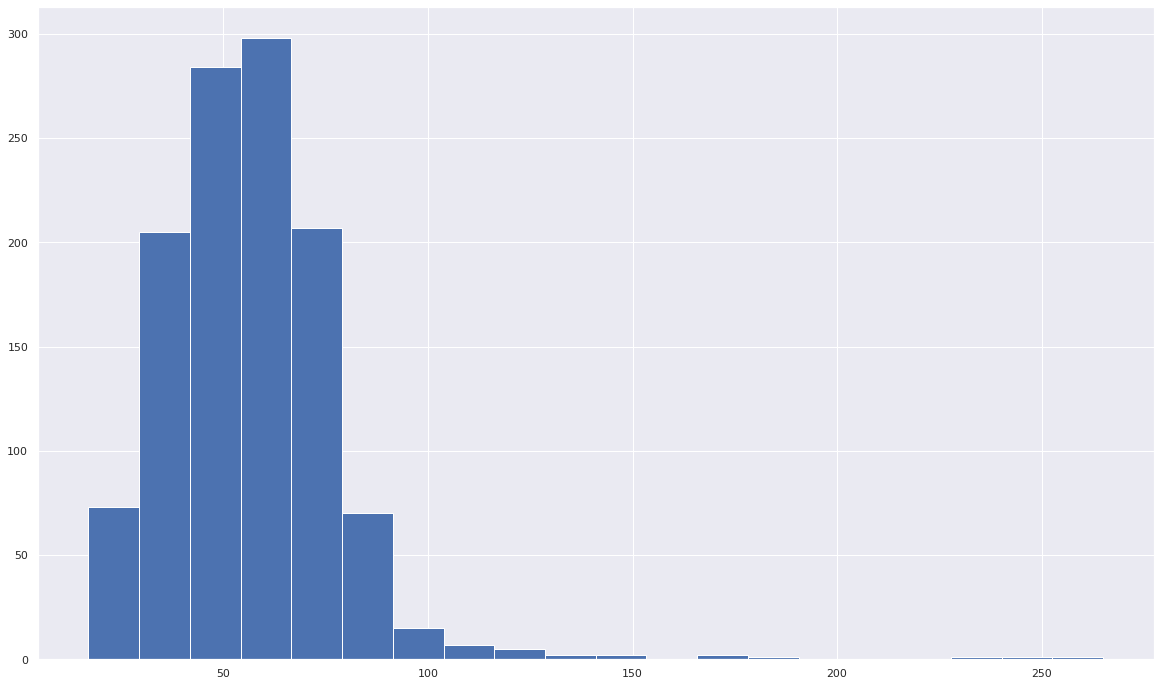

In [263]:
plt.hist(speaker_age.values(), bins=20)

In [242]:
wing = []
ages = []
gender = []


for speaker in speaker_content:
    if speaker in speaker_age.keys() and speaker in speaker_gender.keys() and speaker in speaker_wing.keys() and speaker_age[speaker]<120:
 
        ages.append(speaker_age[speaker])
        wing.append(speaker_wing[speaker][0])
        gender.append(speaker_gender[speaker])


(array([238.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 172.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

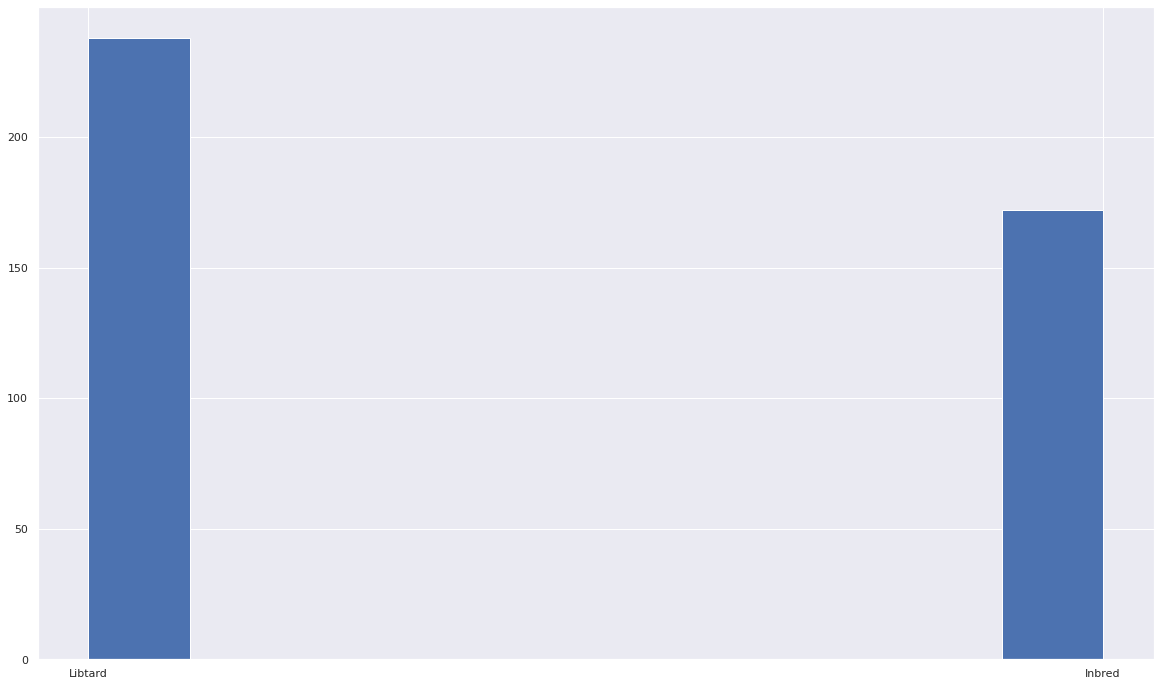

In [262]:
plt.hist(wing)

(array([ 2.,  5.,  7., 14., 20., 33., 40., 28., 50., 63., 44., 41., 36.,
        10.,  6.,  3.,  3.,  2.,  0.,  3.]),
 array([ 19.  ,  23.75,  28.5 ,  33.25,  38.  ,  42.75,  47.5 ,  52.25,
         57.  ,  61.75,  66.5 ,  71.25,  76.  ,  80.75,  85.5 ,  90.25,
         95.  ,  99.75, 104.5 , 109.25, 114.  ]),
 <BarContainer object of 20 artists>)

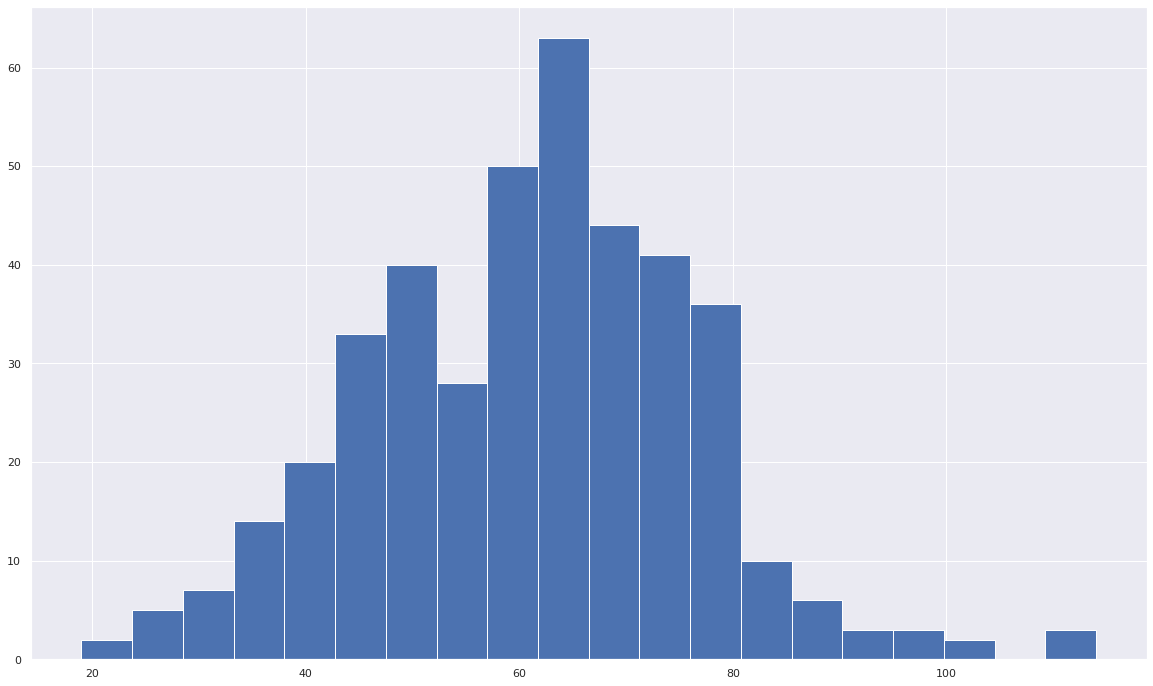

In [261]:
plt.hist(ages,bins=20)

In [244]:
big_dict={}
for speaker in speaker_content:
    if speaker in speaker_age.keys() and speaker in speaker_gender.keys() and speaker in speaker_wing.keys() and speaker_age[speaker]<120:
        big_dict[speaker]=(speaker_age[speaker], speaker_gender[speaker], speaker_wing[speaker][0],speaker_wing[speaker][1])
        

In [245]:
df = pd.DataFrame.from_dict(big_dict, orient="index", columns=["age", "gender", "wing", "political_count"])

In [246]:
df.wing = df.wing.astype( "category")
df.gender = df.gender.astype("category")

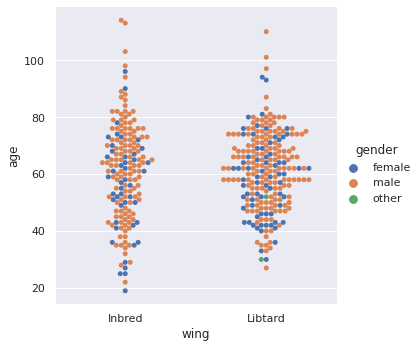

In [258]:
sns.set(rc={'figure.figsize':(20,12)})
sns.catplot(x="wing", y="age", hue="gender", kind="swarm", data=df)

<AxesSubplot:xlabel='age', ylabel='Count'>

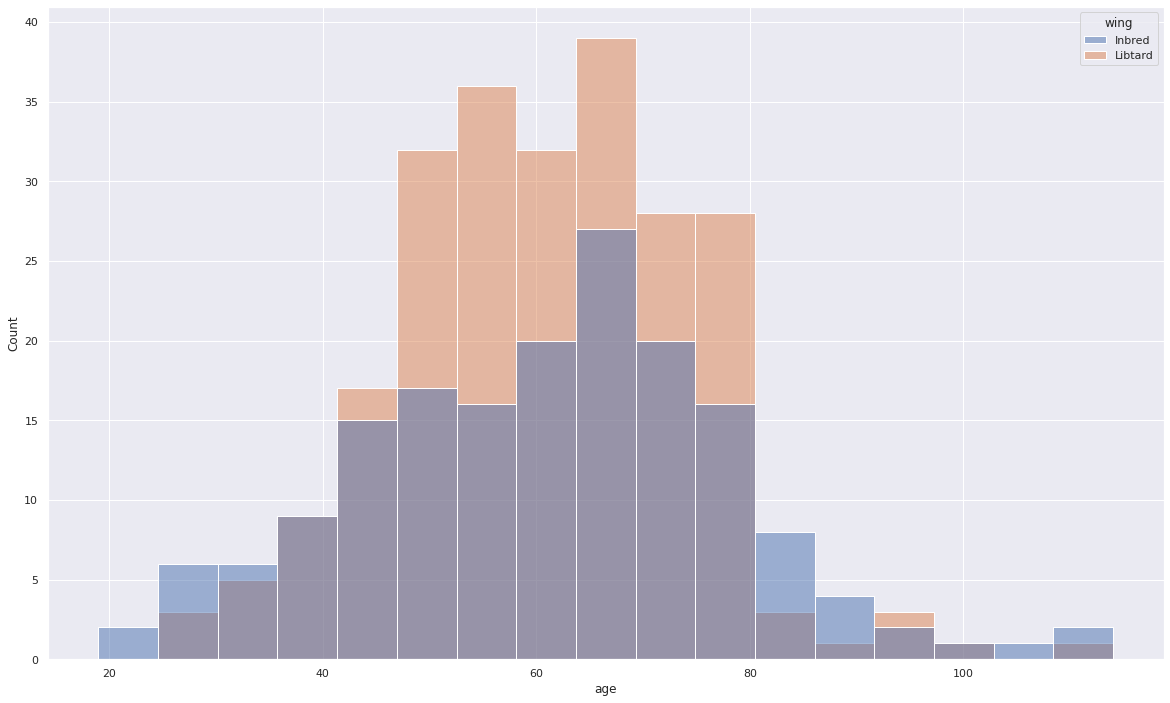

In [259]:
sns.histplot(data=df, x="age", hue="wing")

<AxesSubplot:xlabel='age', ylabel='Count'>

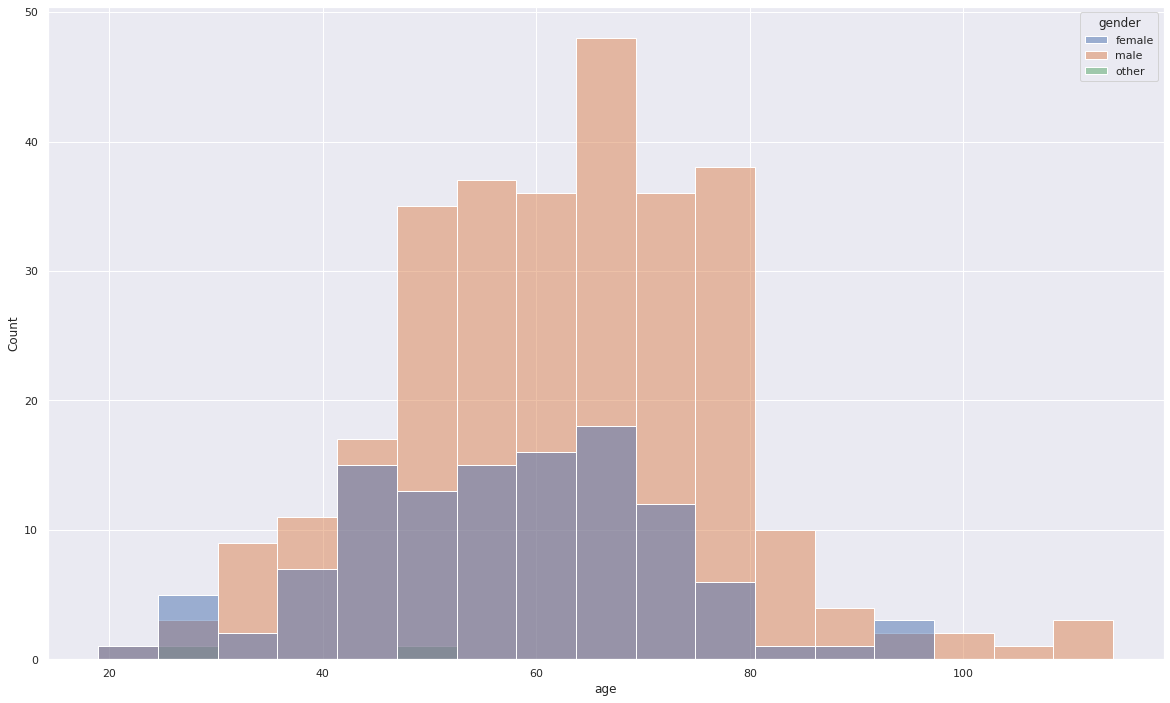

In [260]:
sns.histplot(data=df, x="age", hue="gender")